# Introducción a Movimiento Geométrico Browniano

In [4]:
# Librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt

In [5]:
stocks = ["MSFT"]

prices = yf.download(stocks, start="2020-01-01", end="2025-01-01", progress=False)["Close"]

prices.head()

C:\Users\alvaro.morales\AppData\Local\Temp\ipykernel_24568\2926437111.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices = yf.download(stocks, start="2020-01-01", end="2025-01-01", progress=False)["Close"]


Ticker,MSFT
Date,
2020-01-02,152.791107
2020-01-03,150.888611
2020-01-06,151.278580
2020-01-07,149.899323
2020-01-08,152.286926


In [6]:
returns = prices.pct_change().dropna()

returns.head()

Ticker,MSFT
Date,
2020-01-03,-0.012452
2020-01-06,0.002584
2020-01-07,-0.009117
2020-01-08,0.015928
2020-01-09,0.012493


In [7]:
#Rendimiento promedio diario

returns.mean()

Ticker
MSFT    0.000988
dtype: float64

In [8]:
#Rendimiento promedio anual compuesto

(1+returns.mean())**252 -1

Ticker
MSFT    0.282496
dtype: float64

In [9]:
# Volatilidad de los rendimientos diarias

returns.std()

Ticker
MSFT    0.019211
dtype: float64

In [10]:
# Volatilidad de los rendimientos anual

returns.std() * np.sqrt(252)

Ticker
MSFT    0.304972
dtype: float64

In [11]:
def get_data(stocks, start, end):
    prices = yf.download(stocks, start="2020-01-01", end="2025-01-01", progress=False)["Close"]
    returns = prices.pct_change().dropna()
    mean_returns = returns.mean()
    std_returns = returns.std()
    return mean_returns, std_returns, prices

In [12]:
mean_returns, std_returns, prices = get_data("MSFT","2020-01-01","2025-01-01" )

print(mean_returns)
print(std_returns)

Ticker
MSFT    0.000988
dtype: float64
Ticker
MSFT    0.019211
dtype: float64


C:\Users\alvaro.morales\AppData\Local\Temp\ipykernel_24568\3408724096.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices = yf.download(stocks, start="2020-01-01", end="2025-01-01", progress=False)["Close"]


In [43]:
# Obtener rendimientos y precios simulados (aleatorios)

z = np.random.normal(0,1,10)

simulated_returns = np.array(mean_returns) + np.array(std_returns) * z

#Rendimientos del activo, modelados como meanreturn + std return * z

# Z es una normal etsandar (media=0, std=1)
simulated_returns

array([ 0.00144489,  0.02549393, -0.00166895,  0.0047759 ,  0.02633615,
       -0.02960282, -0.00973391, -0.00925215, -0.01526752,  0.03230444])

In [44]:
cumulative_returns = (1 + simulated_returns).cumprod()

cumulative_returns

array([1.00144489, 1.02697566, 1.02526169, 1.03015824, 1.05728864,
       1.02598992, 1.01600302, 1.00660281, 0.99123448, 1.02325576])

In [45]:
# Rendimiento historico

cumulative_returns[-1] / cumulative_returns[0] -1

0.02177939446534949

In [46]:
initial_price = np.array(prices.iloc[-1])

initial_price

array([419.19656372])

In [47]:
simulated_prices = initial_price + cumulative_returns

simulated_prices

array([420.19800861, 420.22353938, 420.22182541, 420.22672196,
       420.25385236, 420.22255364, 420.21256674, 420.20316653,
       420.1877982 , 420.21981948])

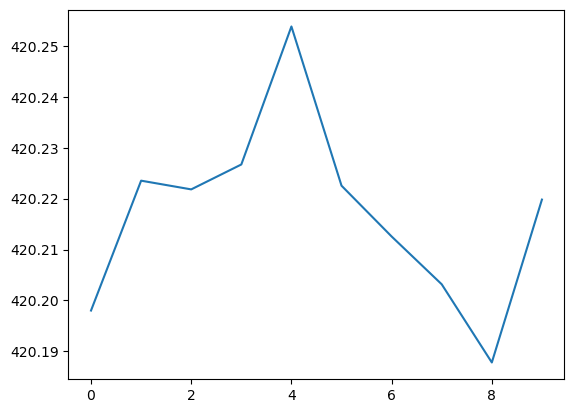

In [48]:
plt.plot(simulated_prices)

plt.show()

### Para un activo

C:\Users\alvaro.morales\AppData\Local\Temp\ipykernel_10552\3656029541.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices = yf.download(stocks, start, end, progress=False)['Close']


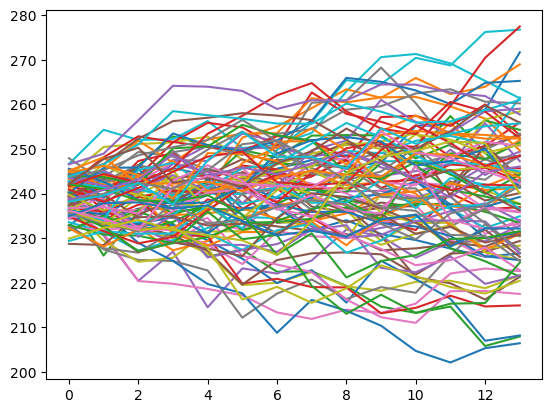

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt

# descargar datos
def get_data(stocks, start, end):
    prices = yf.download(stocks, start, end, progress=False)['Close']
    returns = prices.pct_change().dropna()
    mean_returns = returns.mean()
    std_returns = returns.std()
    return mean_returns, std_returns, prices

# simula una trayectoria de precios para un activo dado
def simular_precios(mean_returns, std_returns, prices, num_dias):
    z = np.random.normal(0,1,num_dias)
    simulated_returns = np.array(mean_returns) + np.array(std_returns) * z
    cumulative_returns = (1 + simulated_returns).cumprod()
    initial_price = np.array(prices.iloc[-1])
    simulated_prices = initial_price * cumulative_returns
    return simulated_prices


mean_returns, std_returns, prices = get_data(["AAPL"], dt.datetime.now() - dt.timedelta(days = 365 * 4), dt.datetime.now() )

precios = simular_precios(mean_returns, std_returns, prices, 21)


num_simulaciones = 100
num_dias = 14
trayectorias_de_precios = np.zeros((num_simulaciones, num_dias))



for i in range(num_simulaciones):
    precios = simular_precios(mean_returns, std_returns, prices, num_dias)
    trayectorias_de_precios[i, :] = precios

plt.plot(trayectorias_de_precios.T)
plt.show()

### Para un Portafolio

C:\Users\alvaro.morales\AppData\Local\Temp\ipykernel_10552\2252458292.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices = yf.download(stocks, start, end, progress = False)['Close']


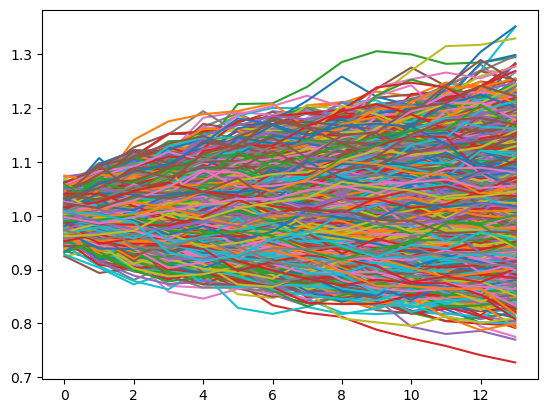

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt

# descargar datos
def get_data(stocks, start, end):
    prices = yf.download(stocks, start, end, progress = False)['Close']
    returns = prices.pct_change()
    mean_returns = returns.mean()
    matriz_cov = returns.cov()
    return mean_returns, matriz_cov, prices


def simular_precios(num_simulaciones, weights, mean_returns, matriz_cov, prices, num_dias):
    #Matriz para contener los rendimientos simulados en tu portafolio
    portfolio_returns = np.full(shape = (num_simulaciones, num_dias), fill_value = 0.0 )

    for i in range(num_simulaciones):
        L = np.linalg.cholesky(matriz_cov)
        z = np.random.normal(0,1, (num_dias, len(weights)))
        daily_returns = np.array(mean_returns) + z @ L.T

        # rendimientos diarios ponderados por activos
        daily_portfolio_returns = (daily_returns @ weights)
        # rend. acumulados a nivel
        cumulative_returns = np.cumprod(daily_portfolio_returns + 1)
        portfolio_returns[i, :] = cumulative_returns

    return portfolio_returns

stocks = ["AAPL", "MSFT", "NVDA"]
weights = [0.5,0.2, 0.3]
num_dias = 14

mean_returns, matriz_cov, prices = get_data(stocks, dt.datetime.now() - dt.timedelta(days = 365 * 4), dt.datetime.now() )

rendimientos_portafolio = simular_precios(10000, weights, mean_returns, matriz_cov, prices, num_dias)

plt.plot(rendimientos_portafolio.T)
plt.show()

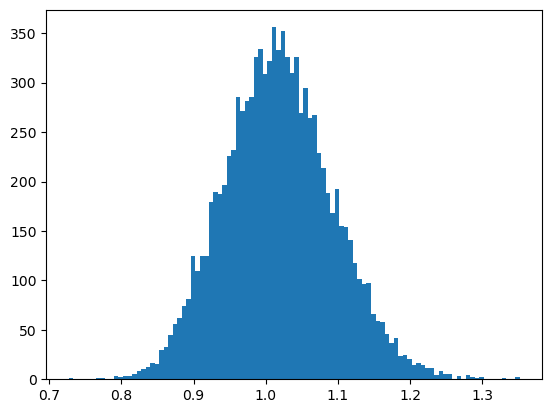

In [36]:
plt.hist(rendimientos_portafolio[:,-1], bins = 100)
plt.show()

In [37]:
np.percentile(rendimientos_portafolio[:,-1], 2.5)

0.8778167690764396

In [38]:
np.percentile(rendimientos_portafolio[:,-1], 97.5)

1.1710014821517882